Importing relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from statistics import mean
from scipy.stats import pearsonr
import re
import seaborn as sns

Set constants (denoted with capitals)

In [2]:
SRC_PATH = 'src'
DATA_PATH = 'output_HSPG_decay/plots_data'
SAVE_PATH = 'output_HSPG_decay/figures'
FILENAME_PREFIX = "20240218_"

create output directory if one does not exist


In [3]:
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [4]:
decay_00 = []
decay_01 = []
decay_05 = []
decay_09 = []
decay_10 = []
for subdir, dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.find('0.0') >= 0:
             decay_00.append(file)
        elif file.find('0.1') >= 0:
            decay_01.append(file)
        elif file.find('0.5') >= 0:
            decay_05.append(file)
        elif file.find('0.9') >= 0:
            decay_09.append(file)
        elif file.find('1.0') >= 0:
            decay_10.append(file)

In [5]:
decay_10

['HSPGdecay=1.0_iteration1.csv',
 'HSPGdecay=1.0_iteration3.csv',
 'HSPGdecay=1.0_iteration2.csv',
 'HSPGdecay=1.0_iteration6.csv',
 'HSPGdecay=1.0_iteration5.csv',
 'HSPGdecay=1.0_iteration4.csv']

In [6]:
data00 = []
for i in decay_00:
    data = pd.read_csv(f'{DATA_PATH}/decay=0.0/{i}')
    data = data[data['timestep'] == 180]
    data00.append(data)
    print(f'info processing {i}')

data00 = pd.concat(data00)

data01 = []
for i in decay_01:
    data = pd.read_csv(f'{DATA_PATH}/decay=0.1/{i}')
    data = data[data['timestep'] == 180]
    data01.append(data)
    print(f'info processing {i}')

data01 = pd.concat(data01)


data05 = []
for i in decay_05:
    data = pd.read_csv(f'{DATA_PATH}/decay=0.5/{i}')
    data = data[data['timestep'] == 180]
    data05.append(data)
    print(f'info processing {i}')

data05 = pd.concat(data05)


data09 = []
for i in decay_09:
    data = pd.read_csv(f'{DATA_PATH}/decay=0.9/{i}')
    data = data[data['timestep'] == 180]
    data09.append(data)
    print(f'info processing {i}')

data09 = pd.concat(data09)


data10 = []
for i in decay_10:
    data = pd.read_csv(f'{DATA_PATH}/decay=1.0/{i}')
    data = data[data['timestep'] == 180]
    data10.append(data)
    print(f'info processing {i}')

data10 = pd.concat(data10)

info processing HSPGdecay=0.0_iteration1.csv
info processing HSPGdecay=0.0_iteration2.csv
info processing HSPGdecay=0.0_iteration3.csv
info processing HSPGdecay=0.0_iteration6.csv
info processing HSPGdecay=0.0_iteration4.csv
info processing HSPGdecay=0.0_iteration5.csv
info processing HSPGdecay=0.1_iteration5.csv
info processing HSPGdecay=0.1_iteration4.csv
info processing HSPGdecay=0.1_iteration6.csv
info processing HSPGdecay=0.1_iteration3.csv
info processing HSPGdecay=0.1_iteration2.csv
info processing HSPGdecay=0.1_iteration1.csv
info processing HSPGdecay=0.5_iteration6.csv
info processing HSPGdecay=0.5_iteration4.csv
info processing HSPGdecay=0.5_iteration5.csv
info processing HSPGdecay=0.5_iteration1.csv
info processing HSPGdecay=0.5_iteration2.csv
info processing HSPGdecay=0.5_iteration3.csv
info processing HSPGdecay=0.9_iteration4.csv
info processing HSPGdecay=0.9_iteration5.csv
info processing HSPGdecay=0.9_iteration6.csv
info processing HSPGdecay=0.9_iteration2.csv
info proce

List CSV files in my directory

In [7]:
print(data00.shape)
print(data01.shape)
print(data05.shape)
print(data09.shape)
print(data10.shape)

(5, 62)
(6, 62)
(6, 62)
(6, 62)
(5, 62)


In [8]:
data00.index = ['iteration1', 'iteration2', 'iteration3', 'iteration4', 'iteration5']
data01.index = ['iteration1', 'iteration2', 'iteration3', 'iteration4', 'iteration5', 'iteration6']
data05.index = ['iteration1', 'iteration2', 'iteration3', 'iteration4', 'iteration5', 'iteration6']
data09.index = ['iteration1', 'iteration2', 'iteration3', 'iteration4', 'iteration5', 'iteration6']
data10.index = ['iteration1', 'iteration2', 'iteration3', 'iteration4', 'iteration5']

In [9]:
data01 = data01.drop(['iteration6'])
data05 = data05.drop(['iteration6'])
data09 = data09.drop(['iteration6'])

In [10]:
print(data00.shape)
print(data01.shape)
print(data05.shape)
print(data09.shape)
print(data10.shape)

(5, 62)
(5, 62)
(5, 62)
(5, 62)
(5, 62)


In [11]:
data00.insert(1, "theta", [0.0, 0.0, 0.0, 0.0, 0.0], True)
data01.insert(1, "theta", [0.1, 0.1, 0.1, 0.1, 0.1], True)
data05.insert(1, "theta", [0.5, 0.5, 0.5, 0.5, 0.5], True)
data09.insert(1, "theta", [0.9, 0.9, 0.9, 0.9, 0.9], True)
data10.insert(1, "theta", [1.0, 1.0, 1.0, 1.0, 1.0], True)

In [12]:
all_plots = pd.concat([data00, data01, data05, data09, data10])

In [13]:
thetas = [0.0, 0.1, 0.5, 0.9, 1.0]
HFRR_mean = []
HFRR_std = []
all_points = []

for theta in thetas:
    mean_theta = all_plots[all_plots['theta'] == theta]
    HFRR_mean.append(np.mean(mean_theta['15']))
    HFRR_std.append(np.std(mean_theta['15']))
    all_points.append(mean_theta)

/Users/aimee/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aimee/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


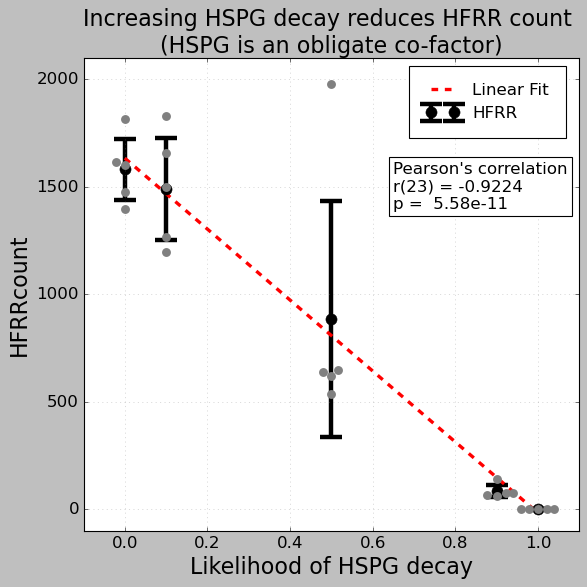

In [19]:
cmap = plt.colormaps['viridis']
viridis = cmap(np.linspace(0,1, 10))

confidence_int = [x * 2 for x in HFRR_std]

x = pearsonr(all_plots['theta'], all_plots['15'])
p_stat = x[0]
p_val = x[1]

plt.style.use('classic')
plt.figure(figsize=(7.5, 7.5))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.errorbar(thetas, HFRR_mean, yerr=HFRR_std, fmt='o', ms=10, label='HFRR', capsize=10, alpha=1, color='black', elinewidth=4, capthick=4, markeredgecolor='black')
plt.xlabel('Likelihood of HSPG decay', fontsize=20)
plt.xlim(-0.1, 1.1)
plt.ylim(-100, 2100)
plt.ylabel('HFRRcount', fontsize=20)
plt.grid(color='grey', alpha=0.5)
plt.title('Increasing HSPG decay reduces HFRR count \n(HSPG is an obligate co-factor)', fontsize=20)
plt.tight_layout()


coefficients = np.polyfit(thetas, HFRR_mean, 1)
poly = np.poly1d(coefficients)
plt.plot(thetas, poly(thetas), color='red', linestyle='--', label='Linear Fit', linewidth=3)  # Plot the linear fit line

plt.text(x=0.65, y=1400, s=f"Pearson's correlation\nr(23) = {p_stat: .4} \np = {p_val: .2e}", bbox=dict( facecolor='White', edgecolor='black'), fontsize=15)
sns.swarmplot(data=all_plots, x='theta', y='15', native_scale=True, color='grey', size=8, alpha=1, legend='auto')
plt.legend(bbox_to_anchor=(0.99,1), borderpad=1, fontsize=15)
plt.savefig('output_HSPG_decay/figures/decay_vs_theta.png')

In [15]:
thetas

[0.0, 0.1, 0.5, 0.9, 1.0]

In [40]:
pearsonr(thetas, HFRR_mean)

PearsonRResult(statistic=-0.9970111373021256, pvalue=0.00019606406476982844)

In [41]:
alldata00 = []
for i in decay_00:
    data = pd.read_csv(f'{DATA_PATH}/decay=0.0/{i}')
    data = data[data['timestep'] >= 140]
    alldata00.append(data)
    print(f'info processing {i}')

alldata00 = pd.concat(alldata00)

alldata01 = []
for i in decay_01:
    data = pd.read_csv(f'{DATA_PATH}/decay=0.1/{i}')
    data = data[data['timestep'] >= 140]
    alldata01.append(data)
    print(f'info processing {i}')

alldata01 = pd.concat(alldata01)


alldata05 = []
for i in decay_05:
    data = pd.read_csv(f'{DATA_PATH}/decay=0.5/{i}')
    data = data[data['timestep'] >= 140]
    alldata05.append(data)
    print(f'info processing {i}')

alldata05 = pd.concat(alldata05)


alldata09 = []
for i in decay_09:
    data = pd.read_csv(f'{DATA_PATH}/decay=0.9/{i}')
    data = data[data['timestep'] >= 140]
    alldata09.append(data)
    print(f'info processing {i}')

alldata09 = pd.concat(alldata09)


alldata10 = []
for i in decay_10:
    data = pd.read_csv(f'{DATA_PATH}/decay=1.0/{i}')
    data = data[data['timestep'] >= 140]
    alldata10.append(data)
    print(f'info processing {i}')

alldata10 = pd.concat(alldata10)

info processing HSPGdecay=0.0_iteration1.csv
info processing HSPGdecay=0.0_iteration2.csv
info processing HSPGdecay=0.0_iteration3.csv
info processing HSPGdecay=0.0_iteration6.csv
info processing HSPGdecay=0.0_iteration4.csv
info processing HSPGdecay=0.0_iteration5.csv
info processing HSPGdecay=0.1_iteration5.csv
info processing HSPGdecay=0.1_iteration4.csv
info processing HSPGdecay=0.1_iteration6.csv
info processing HSPGdecay=0.1_iteration3.csv
info processing HSPGdecay=0.1_iteration2.csv
info processing HSPGdecay=0.1_iteration1.csv
info processing HSPGdecay=0.5_iteration6.csv
info processing HSPGdecay=0.5_iteration4.csv
info processing HSPGdecay=0.5_iteration5.csv
info processing HSPGdecay=0.5_iteration1.csv
info processing HSPGdecay=0.5_iteration2.csv
info processing HSPGdecay=0.5_iteration3.csv
info processing HSPGdecay=0.9_iteration4.csv
info processing HSPGdecay=0.9_iteration5.csv
info processing HSPGdecay=0.9_iteration6.csv
info processing HSPGdecay=0.9_iteration2.csv
info proce

In [42]:
thetas = [x * 4 for x in thetas]

In [43]:
thetas

[0.0, 0.4, 2.0, 3.6, 4.0]

In [44]:
HFRR_mean

[1582.0, 1491.4, 885.4, 85.4, 1.6]

In [45]:
HSPG_00 = pd.read_csv('output_HSPG_decay/plots_data/decay=0.0/HSPGdecay=0.0_iteration4.csv')
HSPG_01 = pd.read_csv('output_HSPG_decay/plots_data/decay=0.1/HSPGdecay=0.1_iteration4.csv')
HSPG_05 = pd.read_csv('output_HSPG_decay/plots_data/decay=0.5/HSPGdecay=0.5_iteration4.csv')
HSPG_09 = pd.read_csv('output_HSPG_decay/plots_data/decay=0.9/HSPGdecay=0.9_iteration4.csv')
HSPG_10 = pd.read_csv('output_HSPG_decay/plots_data/decay=1.0/HSPGdecay=1.0_iteration4.csv')

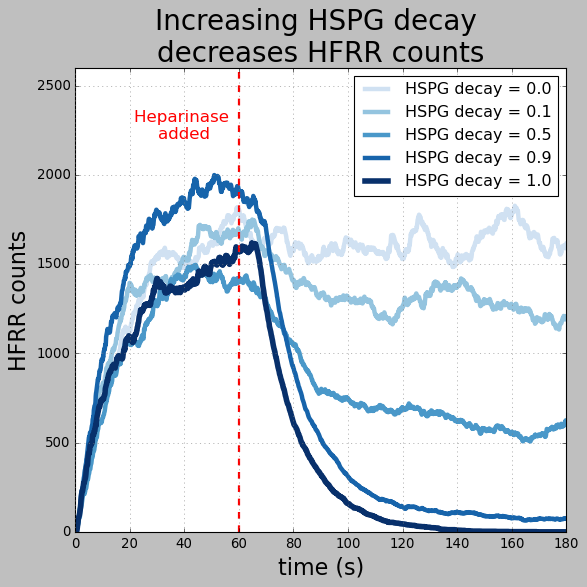

In [67]:
cmap = plt.colormaps['Blues']
viridis = cmap(np.linspace(0.2,1, 5))

plt.figure(figsize=(7.5, 7.5))
plt.style.use('classic')
plt.plot(HSPG_00['timestep'], HSPG_00['15'], label='HSPG decay = 0.0', color=viridis[0], lw=4)
plt.plot(HSPG_01['timestep'], HSPG_01['15'], label='HSPG decay = 0.1', color=viridis[1], lw=4)
plt.plot(HSPG_05['timestep'], HSPG_05['15'], label='HSPG decay = 0.5', color=viridis[2], lw=4)
plt.plot(HSPG_09['timestep'], HSPG_09['15'], label='HSPG decay = 0.9', color=viridis[3], lw=4)
plt.plot(HSPG_10['timestep'], HSPG_10['15'], label='HSPG decay = 1.0', color=viridis[4], lw=5)
plt.xlim(0, 180)
plt.ylim(0, 2600)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('time (s)', fontsize=20)
plt.ylabel('HFRR counts', fontsize=20)
plt.grid(color='grey')
plt.axvline(x=60, color='red', linestyle='--', linewidth=2)
plt.text(40, 2200, 'Heparinase \nadded', color='red', fontsize=15, horizontalalignment='center')
plt.title('Increasing HSPG decay \ndecreases HFRR counts', fontsize=25)
plt.tight_layout()
plt.savefig('output_HSPG_decay/figures/heparinase_addition.png')

In [115]:
mean00 = all_plots[all_plots['theta'] == 0.0 ]
HFRR_mean_00 = np.mean(mean00['15'])
HFRR_std_00 = np.std(mean00['15'])

mean01 = all_plots[all_plots['theta'] == 0.1 ]
HFRR_mean_01 = np.mean(mean01['15'])
HFRR_std_01 = np.std(mean01['15'])

mean05 = all_plots[all_plots['theta'] == 0.5 ]
HFRR_mean_05 = np.mean(mean05['15'])
HFRR_std_05 = np.std(mean05['15'])

mean09 = all_plots[all_plots['theta'] == 0.9 ]
HFRR_mean_09 = np.mean(mean09['15'])
HFRR_std_09 = np.std(mean09['15'])

mean10 = all_plots[all_plots['theta'] == 1.0 ]
HFRR_mean_10 = np.mean(mean10['15'])
HFRR_std_10 = np.std(mean10['15'])


mean_00 = all_plots[all_plots['theta'] == 0.0 ]
FRR_mean_00 = np.mean(mean00['16'])
FRR_std_00 = np.std(mean00['16'])

mean01 = all_plots[all_plots['theta'] == 0.1 ]
FRR_mean_01 = np.mean(mean01['16'])
FRR_std_01 = np.std(mean01['16'])

mean05 = all_plots[all_plots['theta'] == 0.5 ]
FRR_mean_05 = np.mean(mean05['16'])
FRR_std_05 = np.std(mean05['16'])

mean09_FRR = all_plots[all_plots['theta'] == 0.9 ]
FRR_mean_09 = np.mean(mean09['16'])
FRR_std_09 = np.std(mean09['16'])

mean10_FRR = all_plots[all_plots['theta'] == 1.0 ]
FRR_mean_10 = np.mean(mean10_FRR['16'])
FRR_std_10 = np.std(mean10_FRR['16'])

sum_counts_00 = mean00['15'] + mean00['16']
sum_mean_00 = np.mean(sum_counts_00)
sum_std_00 = np.std(sum_counts_00)
sum_counts_01 = mean01['15'] + mean01['16']
sum_mean_01 = np.mean(sum_counts_01)
sum_std_01 = np.std(sum_counts_01)
sum_counts_05 = mean05['15'] + mean05['16']
sum_mean_05 = np.mean(sum_counts_05)
sum_std_05 = np.std(sum_counts_05)
sum_counts_09 = mean09['15'] + mean09['16']
sum_mean_09 = np.mean(sum_counts_09)
sum_std_09 = np.std(sum_counts_09)
sum_counts_10 = mean10['15'] + mean10['16']
sum_mean_10 = np.mean(sum_counts_10)
sum_std_10 = np.std(sum_counts_10)

sum_means = [sum_mean_00, sum_mean_01, sum_mean_05, sum_mean_09, sum_mean_10]
sum_std = [sum_std_00, sum_std_01, sum_std_05, sum_std_09, sum_std_10]
means1 = pd.concat([mean00['15'], mean01['15'], mean05['15'], mean09['15'], mean10['15']])
means2 = pd.concat([mean00['16'], mean01['16'], mean05['16'], mean09['16'], mean10['16']])

In [121]:
membrane_F_species_00 = mean00['14'] + mean00['15'] + mean00['16']
memF_mean_00 = np.mean(membrane_F_species_00)
memF_std_00 = np.std(membrane_F_species_00)
log_std_00 = np.std(np.log(membrane_F_species_00))
membrane_F_species_01 = mean01['14'] + mean01['15'] + mean01['16']
memF_mean_01 = np.mean(membrane_F_species_01)
memF_std_01 = np.std(membrane_F_species_01)
log_std_01 = np.std(np.log(membrane_F_species_01))
membrane_F_species_05 = mean05['14'] + mean05['15'] + mean05['16']
memF_mean_05 = np.mean(membrane_F_species_05)
memF_std_05 = np.std(membrane_F_species_05)
log_std_05= np.std(np.log(membrane_F_species_05))
membrane_F_species_09 = mean09['14'] + mean09['15'] + mean09['16']
memF_mean_09 = np.mean(membrane_F_species_09)
memF_std_09 = np.std(membrane_F_species_09)
log_std_09 = np.std(np.log(membrane_F_species_09))
membrane_F_species_10 = mean10['14'] + mean10['15'] + mean10['16']
memF_mean_10 = np.mean(membrane_F_species_10)
memF_std_10 = np.std(membrane_F_species_10)
log_std_10 = np.std(np.log(membrane_F_species_10))

memF_means = [memF_mean_00, memF_mean_01, memF_mean_05, memF_mean_09, memF_mean_10]
memF_stds = [memF_std_00, memF_std_01, memF_std_05, memF_std_09, memF_std_10]
log_stds = [log_std_00, log_std_01, log_std_05, log_std_09, log_std_10]

F_species = []
F_species.extend(membrane_F_species_00.tolist())
F_species.extend(membrane_F_species_01.tolist())
F_species.extend(membrane_F_species_05.tolist())
F_species.extend(membrane_F_species_09.tolist())
F_species.extend(membrane_F_species_10.tolist())
thetas1 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0,]


In [123]:
len(thetas1)

25

/Users/aimee/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/aimee/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


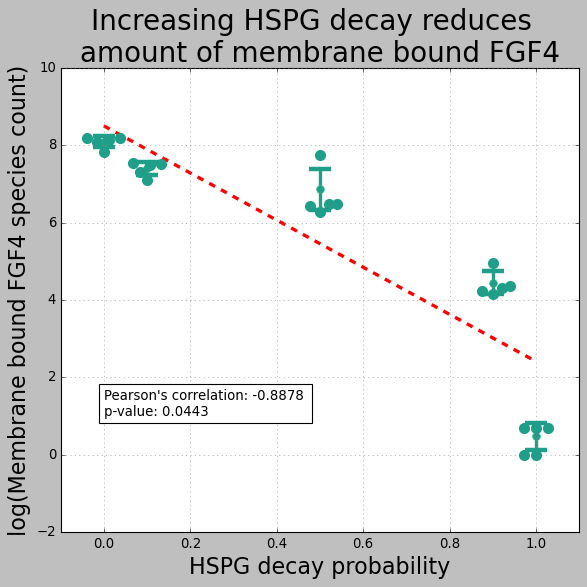

In [125]:
cmap = plt.colormaps['viridis']
viridis = cmap(np.linspace(0,1, 10))

x = pearsonr(thetas, np.log(memF_means))
p_stat = x[0]
p_val = x[1]

plt.figure(figsize=(7.5, 7.5))
plt.style.use('classic')
plt.errorbar(thetas, np.log(memF_means), yerr=log_stds, fmt='o', ms=7, capsize=10, capthick=4, lw=3, color=viridis[5], markeredgecolor=viridis[6])
coefficients = np.polyfit(thetas, np.log(memF_means), 1)
poly = np.poly1d(coefficients)
sns.swarmplot(x=thetas1, y=np.log(F_species), native_scale=True, color=viridis[5], size=10)
plt.text(x=0, y=1, s=f"Pearson's correlation: {round(p_stat, 4)} \np-value: {round(p_val, 4)}", bbox=dict( facecolor='White', edgecolor='black'))
plt.xlabel('HSPG decay probability', fontsize=20)
plt.xlim(-0.1, 1.1)
plt.ylabel('log(Membrane bound FGF4 species count)', fontsize=20)
plt.grid(color='grey')
plt.title('Increasing HSPG decay reduces  \namount of membrane bound FGF4', fontsize=25)
plt.plot(thetas, poly(thetas), color='red', linestyle='--', linewidth=3)  # Plot the linear fit line
plt.tight_layout()
plt.savefig('output_HSPG_decay/figures/membrane_FGF_log.png')